In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
df_train = pd.read_excel("Data_Train.xlsx")


In [5]:
df_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
df_train.shape

(10683, 11)

In [5]:
df_train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [3]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
df_train.dropna(inplace = True)

In [7]:
df_train[df_train.duplicated()].head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303


Here we will be removing those repeated values from the dataset and keeping the in-place attribute to be true so that there will be no changes.

In [8]:
df_train.drop_duplicates(keep='first',inplace=True)
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

There is no null value or duplicate value present

# EDA

In [12]:
df_train.describe()

,Price
count,10462.000000
mean,9026.790289
std,4624.849541
min,1759.000000
25%,5224.000000
50%,8266.000000
75%,12344.750000
max,79512.000000


In [8]:
df_train["Additional_Info"].value_counts()

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
2 Long layover                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [9]:
df_train["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [9]:
df_test = pd.read_excel("test_set.xlsx")

In [9]:
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [20]:
df_test.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
5,Jet Airways,12/06/2019,Delhi,Cochin,DEL → BOM → COK,18:15,12:35 13 Jun,18h 20m,1 stop,In-flight meal not included
6,Air India,12/03/2019,Banglore,New Delhi,BLR → TRV → DEL,07:30,22:35,15h 5m,1 stop,No info
7,IndiGo,1/05/2019,Kolkata,Banglore,CCU → HYD → BLR,15:15,20:30,5h 15m,1 stop,No info
8,IndiGo,15/03/2019,Kolkata,Banglore,CCU → BLR,10:10,12:55,2h 45m,non-stop,No info
9,Jet Airways,18/05/2019,Kolkata,Banglore,CCU → BOM → BLR,16:30,22:35,6h 5m,1 stop,No info


In [29]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [30]:
df_test.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [25]:
df_test.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


In [31]:
df_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

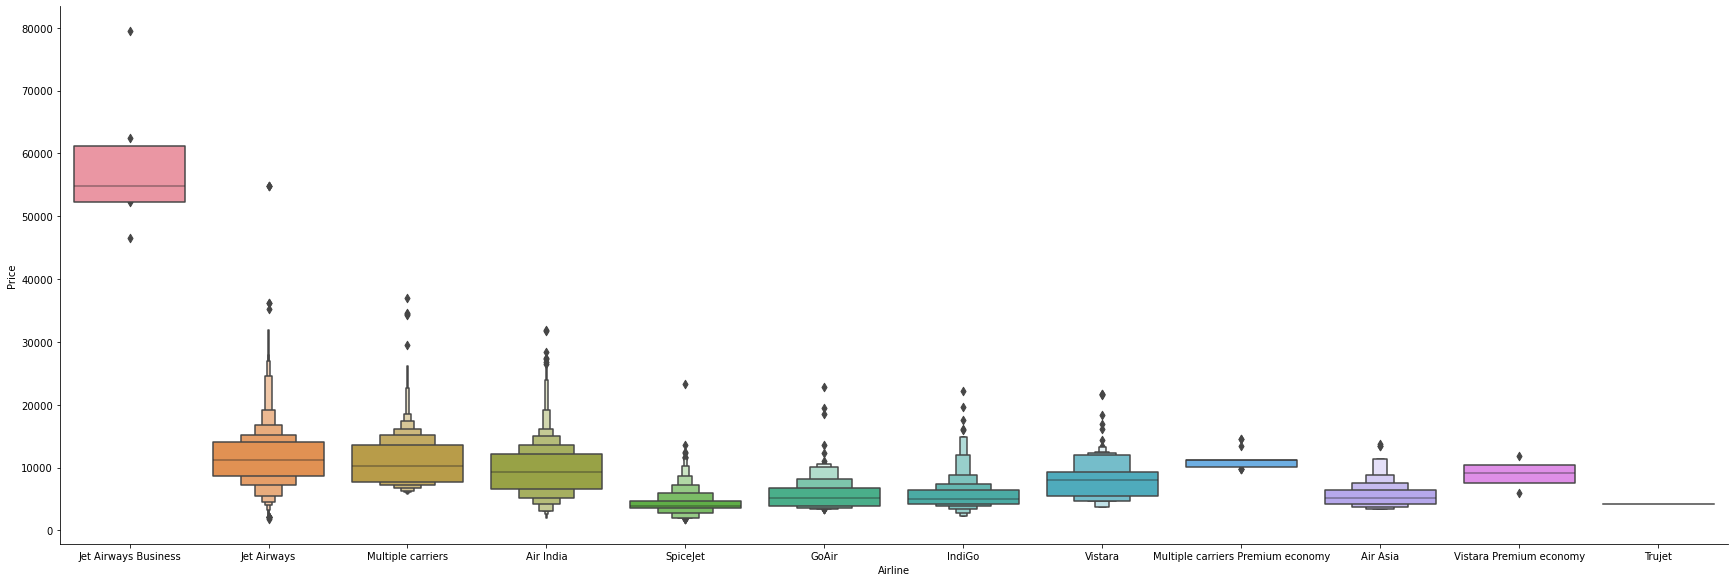

In [28]:
sns.catplot(y = "Price", x = "Airline", data = df_train.sort_values("Price", ascending = False), kind="boxen", height = 8, aspect = 3)
plt.show()

we can conclude that Jet Airways has the most outliers in terms of price.

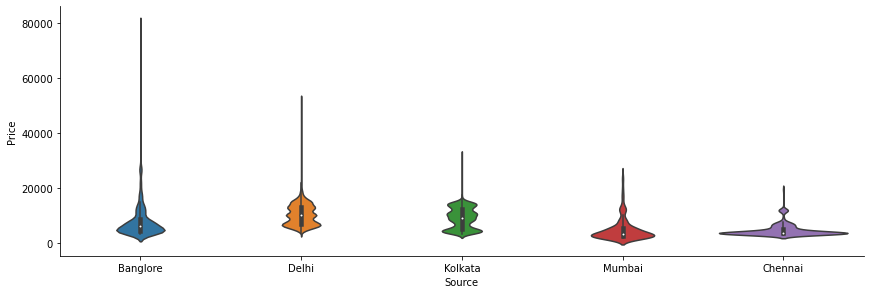

In [29]:
sns.catplot(y = "Price", x = "Source", data = df_train.sort_values("Price", ascending = False), kind="violin", height = 4, aspect = 3)
plt.show()

we can see that Banglore as the source location has the most outliers while Chennai has the least.

# Data Processing for train data

In [31]:
df_train['Duration'] = df_train['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
df_test['Duration'] = df_test['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [10]:
df_train["Journey_day"] = df_train['Date_of_Journey'].str.split('/').str[0].astype(int)
df_train["Journey_month"] = df_train['Date_of_Journey'].str.split('/').str[1].astype(int)

In [11]:
df_train.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [10]:
df_train

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3


Date_of_Journey: Here we are organizing the format of the date of journey in our dataset for better preprocessing in the model stage.

In [12]:
df_train["Dep_hour"] = pd.to_datetime(df_train["Dep_Time"]).dt.hour
df_train["Dep_min"] = pd.to_datetime(df_train["Dep_Time"]).dt.minute
df_train.drop(["Dep_Time"], axis = 1, inplace = True)

Similarly we are converting the arrival time into hours and minutes.

In [13]:
df_train["Arrival_hour"] = pd.to_datetime(df_train.Arrival_Time).dt.hour

# Extracting Minutes
df_train["Arrival_min"] = pd.to_datetime(df_train.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
df_train.drop(["Arrival_Time"], axis = 1, inplace = True)

In [17]:
df_train

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,9,4,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,1,3,11,30,14,10


In [14]:
duration = list(df_train["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   
        else:
            duration[i] = "0h " + duration[i]          

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1])) 

In [15]:
df_train["Duration_hours"] = duration_hours
df_train["Duration_mins"] = duration_mins

In [16]:
df_train.drop(["Duration"], axis = 1, inplace = True)

In [15]:
df_train.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25


In [17]:
Airline = df_train[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [18]:
df_train["Source"].value_counts()

Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [18]:
Source = df_train[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [19]:
Destination = df_train[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [20]:
df_train["Total_Stops"].value_counts()

1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64

In [21]:

df_train.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [22]:
df_train = pd.concat([df_train, Airline, Source, Destination], axis = 1)

In [23]:
df_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [25]:
df_train.head(2)

,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,BLR → DEL,0,No info,3897,24,3,22,20,1,10,...,0,0,0,0,0,0,0,0,0,1
1,CCU → IXR → BBI → BLR,2,No info,7662,1,5,5,50,13,15,...,0,0,0,1,0,0,0,0,0,0


In [67]:
from sklearn.preprocessing import LabelEncoder

In [68]:
for col in df_train.columns:
    if df_train[col].dtypes == 'object':
        encoder = LabelEncoder()
        df_train[col] = encoder.fit_transform(df_train[col])

In [69]:
df_train

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,source
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,1,0
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,1,0,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,1,0,0,1,0,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,1,0,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,19,55,22,25,2,30,...,0,0,1,0,0,0,0,0,0,0
10679,0,4145,27,4,20,45,23,20,2,35,...,0,0,1,0,0,0,0,0,0,0
10680,0,7229,27,4,8,20,11,20,3,0,...,0,0,0,0,0,1,0,0,0,0
10681,0,12648,1,3,11,30,14,10,2,40,...,0,0,0,0,0,0,0,0,1,0


In [49]:
df_train.drop(["source"], axis = 1, inplace = True)

In [56]:
df_test.drop(["source"], axis = 1, inplace = True)

# Data Processing for test data

In [32]:
# Date_of_Journey
df_test["Journey_day"] = pd.to_datetime(df_test.Date_of_Journey, format="%d/%m/%Y").dt.day
df_test["Journey_month"] = pd.to_datetime(df_test["Date_of_Journey"], format = "%d/%m/%Y").dt.month
df_test.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [33]:
df_test["Dep_hour"] = pd.to_datetime(df_test["Dep_Time"]).dt.hour
df_test["Dep_min"] = pd.to_datetime(df_test["Dep_Time"]).dt.minute
df_test.drop(["Dep_Time"], axis = 1, inplace = True)

In [34]:
df_test["Arrival_hour"] = pd.to_datetime(df_test.Arrival_Time).dt.hour
df_test["Arrival_min"] = pd.to_datetime(df_test.Arrival_Time).dt.minute
df_test.drop(["Arrival_Time"], axis = 1, inplace = True)

In [35]:
duration = list(df_test["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   
        else:
            duration[i] = "0h " + duration[i]           

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

In [36]:
df_test["Duration_hours"] = duration_hours
df_test["Duration_mins"] = duration_mins
df_test.drop(["Duration"], axis = 1, inplace = True)

In [37]:
print("Airline")
print("-"*75)
print(df_test["Airline"].value_counts())
Airline = pd.get_dummies(df_test["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(df_test["Source"].value_counts())
Source = pd.get_dummies(df_test["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(df_test["Destination"].value_counts())
Destination = pd.get_dummies(df_test["Destination"], drop_first = True)

Airline
---------------------------------------------------------------------------
Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

Source
---------------------------------------------------------------------------
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

Destination
---------------------------------------------------------------------------
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64


In [38]:
df_test.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
df_test = pd.concat([df_test, Airline, Source, Destination], axis = 1)

df_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [39]:
df_test.head(2)

,Route,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,DEL → BOM → COK,1,No info,6,6,17,30,4,25,10,...,0,0,1,0,0,1,0,0,0,0
1,CCU → MAA → BLR,1,No info,12,5,6,20,10,20,4,...,0,0,0,1,0,0,0,0,0,0


In [28]:
df_test

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,4,2,1,76,0,5,6,6,17,30,4,25,10,55
1,3,3,0,65,0,5,12,5,6,20,10,20,4,0
2,4,2,1,76,0,3,21,5,19,15,19,0,23,45
3,6,2,1,76,0,5,21,5,8,0,21,0,13,0
4,0,0,2,16,4,5,24,6,23,55,2,45,2,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,51,0,5,6,6,20,30,20,25,23,55
2667,3,3,0,43,4,5,27,3,14,20,16,55,2,35
2668,4,2,1,76,0,5,6,3,21,50,4,25,6,35
2669,1,2,1,76,0,5,6,3,4,0,19,15,15,15


In [44]:
df_train.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [45]:
df_test.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [50]:
df_train

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,19,55,22,25,2,30,...,0,0,0,1,0,0,0,0,0,0
10679,0,4145,27,4,20,45,23,20,2,35,...,0,0,0,1,0,0,0,0,0,0
10680,0,7229,27,4,8,20,11,20,3,0,...,0,0,0,0,0,0,1,0,0,0
10681,0,12648,1,3,11,30,14,10,2,40,...,0,0,0,0,0,0,0,0,0,1


In [57]:
df_test

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,6,6,20,30,20,25,23,55,1,...,0,0,0,1,0,0,0,0,0,0
2667,0,27,3,14,20,16,55,2,35,0,...,0,0,0,1,0,0,0,0,0,0
2668,1,6,3,21,50,4,25,6,35,0,...,0,0,1,0,0,1,0,0,0,0
2669,1,6,3,4,0,19,15,15,15,1,...,0,0,1,0,0,1,0,0,0,0


# Data visualization by heatmap

In [54]:
df_train.corr()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
Total_Stops,1.000000,0.602013,-0.018937,0.039003,-0.067523,-0.002695,0.051476,-0.107099,0.730156,-0.150253,...,-0.020571,-0.236125,0.474480,0.050105,-0.260668,0.474480,-0.450456,-0.260668,-0.236125,-0.000170
Price,0.602013,1.000000,-0.159044,-0.113396,0.005155,-0.024155,0.031023,-0.086163,0.504200,-0.131664,...,-0.000236,-0.178107,0.261483,0.015424,-0.229179,0.261483,-0.311385,-0.229179,-0.178107,0.199411
Journey_day,-0.018937,-0.159044,1.000000,-0.038331,-0.003394,-0.004741,-0.002448,-0.015086,-0.029382,-0.009244,...,-0.020262,0.007745,0.095882,-0.057415,-0.012759,0.095882,0.004676,-0.012759,0.007745,-0.075976
Journey_month,0.039003,-0.113396,-0.038331,1.000000,0.040406,-0.062636,0.001423,-0.099261,0.006410,-0.046325,...,-0.019911,0.006898,0.130845,0.091726,-0.038187,0.130845,0.093871,-0.038187,0.006898,-0.452364
Dep_hour,-0.067523,0.005155,-0.003394,0.040406,1.000000,-0.015068,-0.003827,0.072989,-0.000648,-0.018843,...,-0.003387,-0.014639,-0.125286,0.160484,-0.016968,-0.125286,0.010428,-0.016968,-0.014639,-0.022008
Dep_min,-0.002695,-0.024155,-0.004741,-0.062636,-0.015068,1.000000,0.046564,-0.021353,-0.022147,0.089269,...,-0.011466,0.067710,-0.087885,-0.023347,0.038091,-0.087885,0.003314,0.038091,0.067710,0.107839
Arrival_hour,0.051476,0.031023,-0.002448,0.001423,-0.003827,0.046564,1.000000,-0.152036,0.065586,-0.116687,...,0.000689,-0.016056,-0.001259,0.054661,-0.035406,-0.001259,-0.033334,-0.035406,-0.016056,-0.003671
Arrival_min,-0.107099,-0.086163,-0.015086,-0.099261,0.072989,-0.021353,-0.152036,1.000000,-0.075942,0.156176,...,0.000286,-0.031050,-0.210108,0.117536,0.081318,-0.210108,0.095356,0.081318,-0.031050,0.019837
Duration_hours,0.730156,0.504200,-0.029382,0.006410,-0.000648,-0.022147,0.065586,-0.075942,1.000000,-0.133999,...,-0.016226,-0.186251,0.280555,0.140774,-0.232258,0.280555,-0.345514,-0.232258,-0.186251,0.015801
Duration_mins,-0.150253,-0.131664,-0.009244,-0.046325,-0.018843,0.089269,-0.116687,0.156176,-0.133999,1.000000,...,0.005141,-0.098949,-0.163515,0.018156,-0.017203,-0.163515,0.224232,-0.017203,-0.098949,0.078637


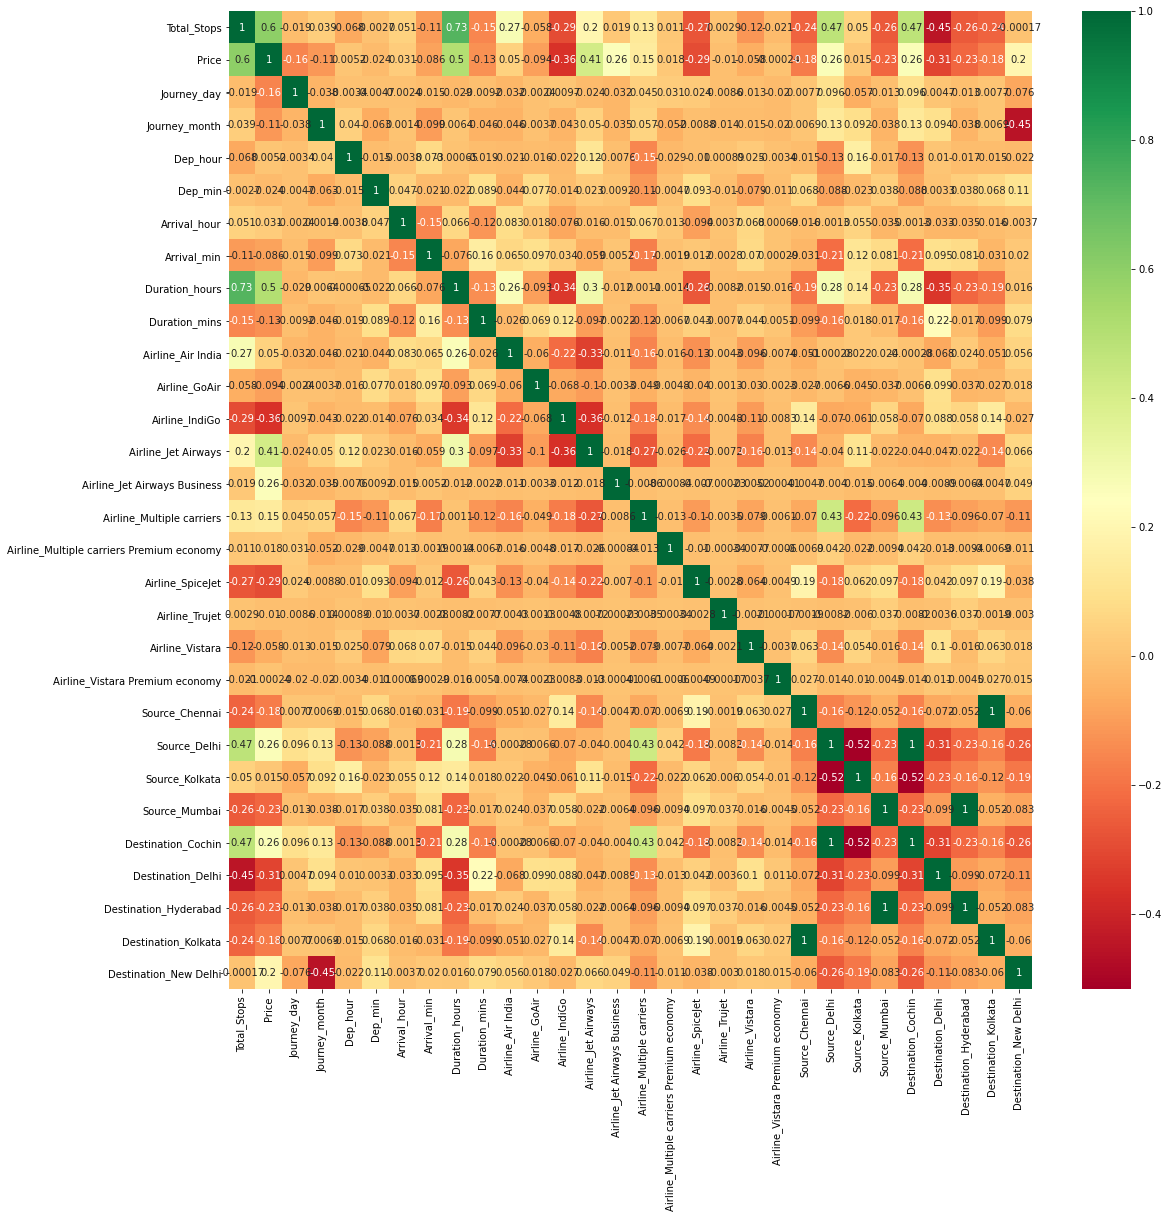

In [55]:
plt.figure(figsize = (18,18))
sns.heatmap(df_train.corr(), annot = True, cmap = "RdYlGn")

plt.show()

# Model Building

In [70]:
x=df_train.drop('Price', axis=1)
y=df_train['Price']

In [59]:
x

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,source
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,1,df_train
1,2,1,5,5,50,13,15,7,25,1,...,0,0,1,0,0,0,0,0,0,df_train
2,2,9,6,9,25,4,25,19,0,0,...,0,1,0,0,1,0,0,0,0,df_train
3,1,12,5,18,5,23,30,5,25,0,...,0,0,1,0,0,0,0,0,0,df_train
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,1,df_train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,9,4,19,55,22,25,2,30,0,...,0,0,1,0,0,0,0,0,0,df_train
10679,0,27,4,20,45,23,20,2,35,1,...,0,0,1,0,0,0,0,0,0,df_train
10680,0,27,4,8,20,11,20,3,0,0,...,0,0,0,0,0,1,0,0,0,df_train
10681,0,1,3,11,30,14,10,2,40,0,...,0,0,0,0,0,0,0,0,1,df_train


In [60]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10462, dtype: int64

In [71]:
features=df_train.drop("Price",axis=1)
target=df_train["Price"]

In [65]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression 
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [72]:
for i in range(0,1000):
    features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=i)
    lr.fit(features_train,target_train)
    pred_train=lr.predict(features_train)
    pred_test=lr.predict(features_test)
    print(f"At random state {i}, the training academy is:-{r2_score(target_train,pred_train)}")
    print(f"At random state {i}, the training academy is:-{r2_score(target_test,pred_test)}")
    print("\n")

At random state 0, the training academy is:-0.6314135216029017
At random state 0, the training academy is:-0.5876298736835857


At random state 1, the training academy is:-0.6180399976490121
At random state 1, the training academy is:-0.6429182289552526


At random state 2, the training academy is:-0.6116842909925919
At random state 2, the training academy is:-0.649804493861442


At random state 3, the training academy is:-0.6253923712782049
At random state 3, the training academy is:-0.6101337818435724


At random state 4, the training academy is:-0.6242541666990185
At random state 4, the training academy is:-0.617329433052052


At random state 5, the training academy is:-0.6299020292684278
At random state 5, the training academy is:-0.592425686457469


At random state 6, the training academy is:-0.6417772100650788
At random state 6, the training academy is:-0.5486078325511288


At random state 7, the training academy is:-0.6147369091587218
At random state 7, the training academy is:-

In [73]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=26)

In [74]:
lr.fit(features_train,target_train)

LinearRegression()

In [75]:
pred_test=lr.predict(features_test)

In [76]:
print(r2_score(target_test,pred_test))

0.6205587756347579


In [77]:
Train_accuracy=r2_score(target_train,pred_train)
Test_accuracy=r2_score(target_test,pred_test)
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,features,target,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold{j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy}and accuracy for the testing is {Test_accuracy}")
    print("\n")

At cross fold2 the cv score is 0.6179596834284662 and accuracy score for training is -0.63147615156316and accuracy for the testing is 0.6205587756347579


At cross fold3 the cv score is 0.6185837849985978 and accuracy score for training is -0.63147615156316and accuracy for the testing is 0.6205587756347579


At cross fold4 the cv score is 0.6208349536243873 and accuracy score for training is -0.63147615156316and accuracy for the testing is 0.6205587756347579


At cross fold5 the cv score is 0.6192794214982091 and accuracy score for training is -0.63147615156316and accuracy for the testing is 0.6205587756347579


At cross fold6 the cv score is 0.6199629530440088 and accuracy score for training is -0.63147615156316and accuracy for the testing is 0.6205587756347579


At cross fold7 the cv score is 0.6189779418722211 and accuracy score for training is -0.63147615156316and accuracy for the testing is 0.6205587756347579


At cross fold8 the cv score is 0.6190231907846581 and accuracy score f

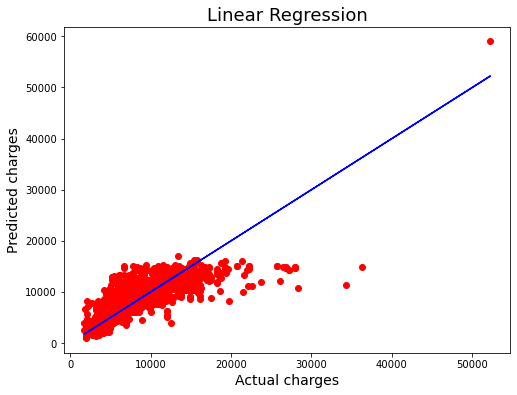

In [78]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=target_test,y=pred_test,color='r')
plt.plot(target_test,target_test,color='b')
plt.xlabel('Actual charges',fontsize=14)
plt.ylabel('Predicted charges',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

# Cross Validation score

In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [80]:
from sklearn.linear_model import Lasso
parameters={'alpha': [.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls = Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)
print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [81]:
ls=Lasso(alpha=10,random_state=0)
ls.fit(features_train,target_train)
ls.score(features_train,target_train)
pred_ls=ls.predict(features_test)
lss=r2_score(target_test,pred_ls)
lss

0.6147120930651924

In [82]:
cv_score=cross_val_score(ls,features,target,cv=4)
cv_mean=cv_score.mean()
cv_mean

0.6105706230899474

# Hyperparameter tuning

In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(features_train,target_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'sqrt'}


In [84]:
rf=RandomForestRegressor(criterion="mse",max_features="sqrt")
rf.fit(features_train,target_train)
rf.score(features_train,target_train)
pred_decision=rf.predict(features_test)
rfs=r2_score(target_test,pred_decision)
print('R2 Score:',rfs*100)
rfscore=cross_val_score(rf,features,target,cv=4)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

R2 Score: 79.92755014134846
Cross Val Score: 79.38020819080027


In [85]:
import pickle
filename='flightprice.pkl'
pickle.dump(rf,open(filename,'wb'))